<a href="https://colab.research.google.com/github/MagdaSousa/QuarentenaDados---Exercicios-/blob/master/QuarentenaDados_aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisando Dataset relacionado a avaliações de Filmes

In [0]:
import pandas as pd
filmes = pd.read_csv('https://gist.githubusercontent.com/MagdaSousa/8e1b64d1148a27e3faa7310de255ce65/raw/d3ef1a72ebf1b8d02b7337787a3ad3c71e1134da/movies.csv')


In [0]:
# vou pegar o arquivo csv que contém as notas dadas para os filmes
avaliacoes = pd.read_csv('https://gist.githubusercontent.com/MagdaSousa/482146fc32e14da2d2d6fe8a5ff880e6/raw/b336613550e636cbec6d3e6a1a75519d8a858fbf/ratings.csv')


In [28]:

filmes.columns = ['filmesid','titulo','generos']
filmes.columns

Index(['filmesid', 'titulo', 'generos'], dtype='object')

In [0]:
#renomeando as colunas
avaliacoes.columns = ['usuarioid', 'filmesid','notas','momento']

In [30]:
# Para verificar dados estatísticos como a média e outros utilizo o método describe
avaliacoes.describe()
# mean-> é a média que diz que o valor médio das notas dadas foi de 3,5. O min é a nota mínima no aso 0,5 e o max é a nota máxima,
#que no caso é 5 

,usuarioid,filmesid,notas,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [31]:
# pegando somente a média referente aos dados do filme 1
avaliacoes.query('filmesid==1').mean()
# só que neste caso ele calcula a média das outras colunas também referentes ao filme 1

usuarioid    3.065302e+02
filmesid     1.000000e+00
notas        3.920930e+00
momento      1.129835e+09
dtype: float64

# AULA 2 

Trabalhando com a culuna generos, que é uma string, e teriamos que estrair todos os generos, e como alguns filmes tem mais de uma então fica complicado....

In [32]:
filmes['generos']
# pegando somente a coluna(variável) generos

0       Adventure|Animation|Children|Comedy|Fantasy
1                        Adventure|Children|Fantasy
2                                    Comedy|Romance
3                              Comedy|Drama|Romance
4                                            Comedy
                           ...                     
9737                Action|Animation|Comedy|Fantasy
9738                       Animation|Comedy|Fantasy
9739                                          Drama
9740                               Action|Animation
9741                                         Comedy
Name: generos, Length: 9742, dtype: object

In [33]:
#Para acessar funções relacionadas a strings no pandas, temos que chamar a função str,
#e apartir dela, chamr as outra que queremos para manipular a string

#Agora vamos  chamremos uma função que vai quebrar essa string em várias, retirando os pipes , e fatiando a string

#As novas strings formadas ser'ao chamadas de dummies
filmes['generos'].str.get_dummies()
#funciona tbm com a pipe filmes['generos'].str.get_dummies('|')
# esta função vai percorrer todos os generos de cada filme, separar em colunas(exluindo os repetidos), e cada filme, caso ele pertença
# aquele determindao genero, vai aparecer o número1, e caso não pertença vai aparecer o número 0

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
filmes['generos'].str.get_dummies().sum()
#agora vamos somar a quantidade de filems que tem o genero ação, terror e etc.........
# Neste caso ele lista que existem cerca de 34 categorias, e que  poe exemplo há 1828 filmes do genero action

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

Para fazer com que a soma seja feita pelo outro eixo ou seja no caso a linha, basta usar um outro parametro 'axis'. O 1 indica que vc está querendo que seja feita a soma pela linha, no caso utilizando como exemplo o filme '0', ele fará a soma 
da quantidade de genêros enconrados para este filme.

In [35]:
filmes['generos'].str.get_dummies().sum(axis=1)

0       5
1       3
2       2
3       3
4       1
       ..
9737    4
9738    3
9739    1
9740    2
9741    1
Length: 9742, dtype: int64

Ou seja para fazer a amostragem anterior, que somava as colunas, dizendo a quantidade de filmes que possuiam aquele determinado 
genêro, podemos fazer utilizando o número 0.

In [36]:
filmes['generos'].str.get_dummies().sum(axis=0)

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

Agora vamos pedir para contar a frequência de generos que mais aparecem.Exemplo: existem 3.000 filmes que possuem apenas 2 genêros,4.500 filmes com apenas 1 categoria.

In [37]:
filmes['generos'].str.get_dummies().sum(axis=1).value_counts()
# neste caso existem 3218 filmes com apenas 2 genêros

2     3218
1     2851
3     2338
4      987
5      271
6       63
7       12
10       1
8        1
dtype: int64

Como a soma que mostrava a quantidade de filmes de acordo com a categoria, estava desordenada, não dava para saber qual genero tinha a maior frequência e qual tinha a menor frequência então vamos ordenar, pela ordem decrescente:

In [38]:
filmes['generos'].str.get_dummies().sum().sort_values(ascending=False)

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

Ordenando agora de maneira crescente:

In [39]:
filmes['generos'].str.get_dummies().sum().sort_values(ascending=True)

(no genres listed)      34
Film-Noir               87
IMAX                   158
Western                167
Musical                334
War                    382
Documentary            440
Mystery                573
Animation              611
Children               664
Fantasy                779
Horror                 978
Sci-Fi                 980
Crime                 1199
Adventure             1263
Romance               1596
Action                1828
Thriller              1894
Comedy                3756
Drama                 4361
dtype: int64

Obs.: Parece ter duas colunas, nome do genero e valores, porém só há uma coluna a dos valores, os nomes só aparecem para nós podermos nos orientar e saber de qual item nós estamos falando porém esse índice não pode ser manipulado, pois só será para visualização, somente os valores são manipulados.

Atenção: está coluna é uma série do tipo inteiro, uma espécie de array

Acessando o índice do dataframe:

In [40]:
filmes.index

RangeIndex(start=0, stop=9742, step=1)

In [41]:
filmes.values

array([[1, 'Toy Story (1995)',
        'Adventure|Animation|Children|Comedy|Fantasy'],
       [2, 'Jumanji (1995)', 'Adventure|Children|Fantasy'],
       [3, 'Grumpier Old Men (1995)', 'Comedy|Romance'],
       ...,
       [193585, 'Flint (2017)', 'Drama'],
       [193587, 'Bungo Stray Dogs: Dead Apple (2018)',
        'Action|Animation'],
       [193609, 'Andrew Dice Clay: Dice Rules (1991)', 'Comedy']],
      dtype=object)

Acessando valores e índices da lista já ordenada:

In [42]:
filmes['generos'].str.get_dummies().sum().sort_values(ascending=True).index

Index(['(no genres listed)', 'Film-Noir', 'IMAX', 'Western', 'Musical', 'War',
       'Documentary', 'Mystery', 'Animation', 'Children', 'Fantasy', 'Horror',
       'Sci-Fi', 'Crime', 'Adventure', 'Romance', 'Action', 'Thriller',
       'Comedy', 'Drama'],
      dtype='object')

Como podemos ver os índices desta série são justamente o nome dos genêros dos filmes...

In [43]:
filmes['generos'].str.get_dummies().sum().sort_values(ascending=True).values

array([  34,   87,  158,  167,  334,  382,  440,  573,  611,  664,  779,
        978,  980, 1199, 1263, 1596, 1828, 1894, 3756, 4361])

Acima estamos acessando os valores da série

Agora vamos ordenar os índices da série, onde ele fará uma ordenação alfabética, melhorando a visualização de dados:

In [44]:
filmes['generos'].str.get_dummies().sum().sort_index()

(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
dtype: int64

Agora vamos plotar está série que está ordenada:

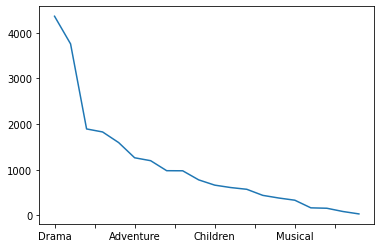

In [45]:
filmes['generos'].str.get_dummies().sum().sort_values(ascending=False).plot()

Notamos que ao plotar ele criou um gráfico de linha, porém não faz sentido, pois as categorias: drama, adventure e etc, não tem relação ma com a outra(uma não é menor que a outra),  temos sim mais filmes de drama do que de adventure, mas a categoria em si, drama, não tem nada a ver com o adventure. Então gráficos de linha são melhores quando lidarmos com dadoe e categorias numéricas, por exemplo: Pessoas com idade de 30 anos assistiram o filme 0 que seria por exemplo jumanji

Como temos categorias que são genêros, e só queremos dizer quantos filmes temos com cada um desses genêros, podemos utilizar o gráfico de 'pizza'....

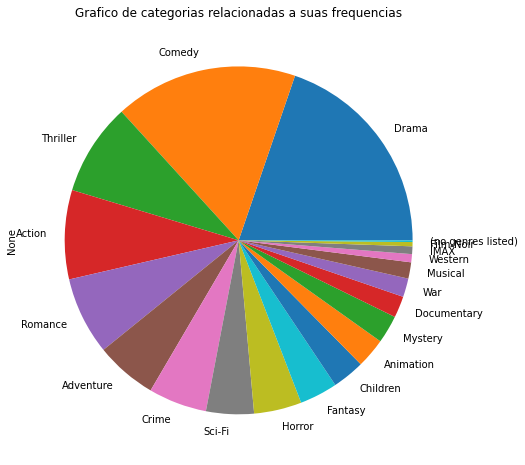

In [46]:
filmes['generos'].str.get_dummies().sum().sort_values(ascending=False).plot(
    kind='pie', 
    title='Grafico de categorias relacionadas a suas frequencias',
    figsize=(8,8))



Utilizamos o figsize, para aumenttar o tamanho do gráfico, para que os nomes não ficassem um em cima do outro, mas ainda continuam, pois são muitas categorias.E notasse um erro grave, as cores estão se repetindo e o que não poderia acontecer, pois os gêneros não tem relação um com o outtro.

Como o gráfico de pizza não é muito bom para comparar áreas vamos utilizar o gráfico de barras:

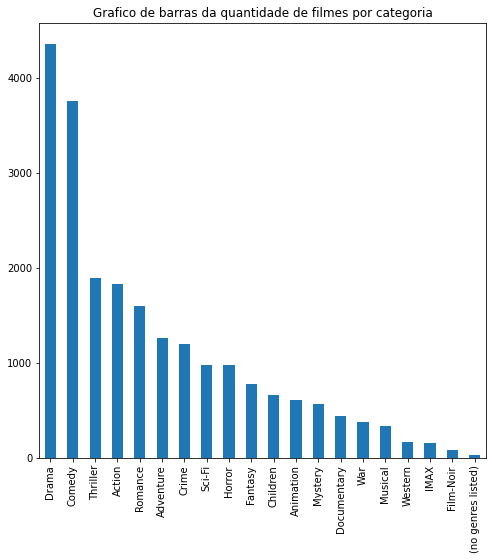

In [47]:
filmes['generos'].str.get_dummies().sum().sort_values(ascending=False).plot(
    kind='bar', 
    title='Grafico de barras da quantidade de filmes por categoria',
    figsize=(8,8))


Agora temos a representação da quantidade de filmes por categoria

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Utilizaremos essa função barplot para fazer algumas comprações

neste caso pegaremos os dados brutos, que no caso, são os índicesque são os generos e os valores que são a quantidade de filmes com esse gênero, e vamos dizer que os índices serão a variável x, e os valores a y.

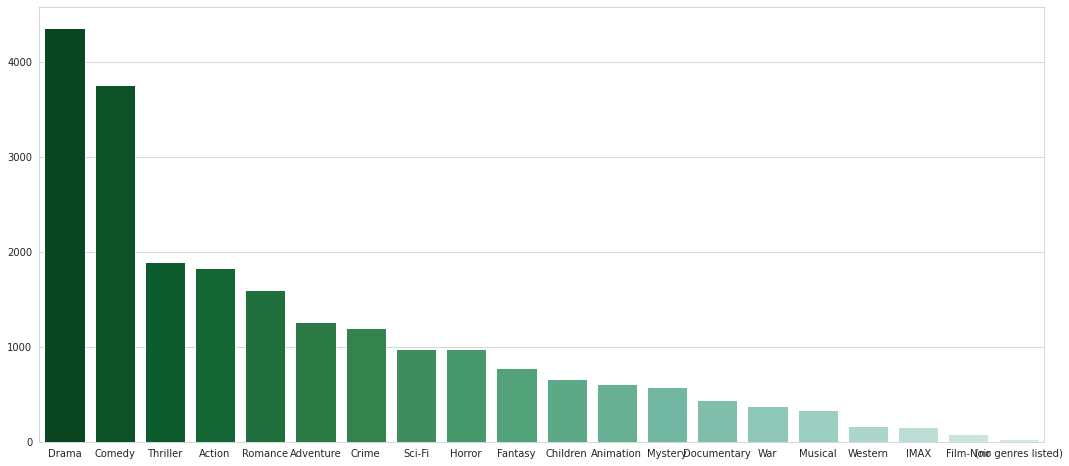

In [49]:
x=filmes['generos'].str.get_dummies().sum().sort_values(ascending=False).index
plt.figure(figsize=(18,8))
sns.set_style("whitegrid")
sns.barplot(
    x=filmes['generos'].str.get_dummies().sum().sort_values(ascending=False).index,
    y=filmes['generos'].str.get_dummies().sum().sort_values(ascending=False).values,
    palette =sns.color_palette("BuGn_r",n_colors=len(x)+5))

plt.show()


Com o parâmetro palette =sns.color_palette("BuGn_r",n_colors=len(x)+5)), passando o tipo de palette que queremos, conseguimos alterar as cores, e o '+5', foi coloccado para escurecer um pouco os tons e a última barrinha não ficar tão apagada.....

colocar os valores em cada barra, colocar gifes texturas em cada barra, no topo....,rotacionar os nomes do generos(thicks)

3.9209302325581397


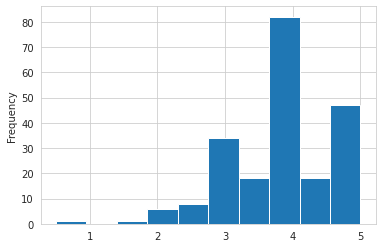

In [50]:
notas_do_filme_1 = avaliacoes.query('filmesid==1')['notas']
print(notas_do_filme_1.mean())
notas_do_filme_1.plot(kind='hist')

3.4318181818181817


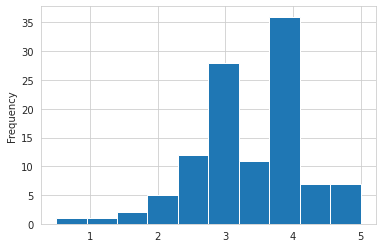

In [51]:
notas_do_filme_2 = avaliacoes.query('filmesid==2')['notas']
print(notas_do_filme_2.mean())
notas_do_filme_2.plot(kind='hist')

In [52]:
notas_do_filme_1.describe()
#Descrevendo todas as características do filme 1 em relção a cálculos de média, media e etc....

count    215.000000
mean       3.920930
std        0.834859
min        0.500000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: notas, dtype: float64

In [53]:
notas_do_filme_2.describe()
#Descrevendo todas as características do filme 2 em relção a cálculos de média, media e etc....

count    110.000000
mean       3.431818
std        0.881713
min        0.500000
25%        3.000000
50%        3.500000
75%        4.000000
max        5.000000
Name: notas, dtype: float64

In [54]:
avaliacoes.groupby('filmesid').mean()


,usuarioid,notas,momento
filmesid,,,
1,306.530233,3.920930,1.129835e+09
2,329.554545,3.431818,1.135805e+09
3,283.596154,3.259615,1.005110e+09
4,219.857143,2.357143,8.985789e+08
5,299.571429,3.071429,9.926643e+08
...,...,...,...
193581,184.000000,4.000000,1.537109e+09
193583,184.000000,3.500000,1.537110e+09
193585,184.000000,3.500000,1.537110e+09


In [55]:
avaliacoes.groupby('filmesid')['notas'].mean()

filmesid
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: notas, Length: 9724, dtype: float64

In [60]:
nome_dos_filmes_junto_com_a_media = filmes.join(media_de_notas_por_filme, on ="filmesid")
# vou juntar as médias por filme junto com seus nomes que estão em outro datafrrame, como se fosse um join do banco de dados
nome_dos_filmes_junto_com_a_media
nome_dos_filmes_junto_com_a_media.sort_values('notas',ascending=False)[376:985]

,filmesid,titulo,generos,notas
6559,55020,"Ten, The (2007)",Comedy,4.500000
6513,53883,"Power of Nightmares, The: The Rise of the Poli...",Documentary,4.500000
7956,96084,Hands Over the City (Le mani sulla città) (1963),Drama,4.500000
3608,4956,"Stunt Man, The (1980)",Action|Adventure|Comedy|Drama|Romance|Thriller,4.500000
4128,5938,Deathtrap (1982),Comedy|Crime|Mystery|Thriller,4.500000
...,...,...,...,...
926,1225,Amadeus (1984),Drama,4.184211
3622,4973,"Amelie (Fabuleux destin d'Amélie Poulain, Le) ...",Comedy|Romance,4.183333
757,994,Big Night (1996),Comedy|Drama,4.181818
3413,4642,Hedwig and the Angry Inch (2000),Comedy|Drama|Musical,4.181818


count    11.000000
mean      4.181818
std       0.716684
min       3.000000
25%       3.750000
50%       4.000000
75%       5.000000
max       5.000000
Name: notas, dtype: float64

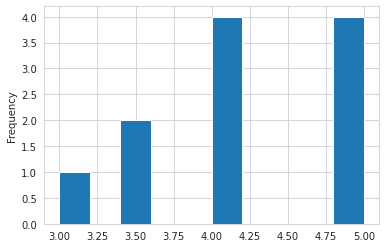

In [61]:
def plota_filmes(n):
    notas_do_filme = avaliacoes.query(f'filmesid=={n}')['notas']
    notas_do_filme.plot(kind='hist')
    return notas_do_filme.describe()
    
plota_filmes(994)

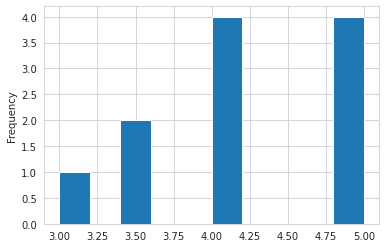

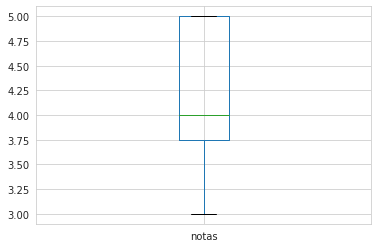

count    11.000000
mean      4.181818
std       0.716684
min       3.000000
25%       3.750000
50%       4.000000
75%       5.000000
max       5.000000
Name: notas, dtype: float64

In [62]:
def plota_filmes(n):
    notas_do_filme = avaliacoes.query(f'filmesid=={n}')['notas']
    notas_do_filme.plot(kind='hist')
    plt.show()
    notas_do_filme.plot.box()
    plt.show()
    return notas_do_filme.describe()
    
plota_filmes(994)

Criando os gráficos de boxplot dos filmes de códigos 1,2,919 e 46.Onde podemos analisar os outiliers dos filmes 1 (que neste caso possue notas entre 0,5 e 1,5 aproximadamente) e filme 2 ( que varia aproximadamente de 0,5 a 1,0...

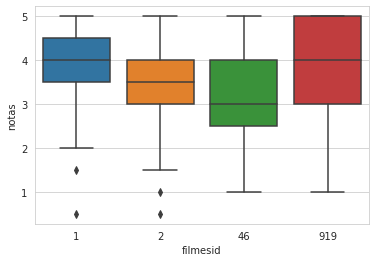

In [59]:
sns.boxplot(data = avaliacoes.query('filmesid in [1,2,919,46]'),x='filmesid',y='notas')
#utilizando a biblioteca seaborn, para criar o boxplot destes quatro filmes